In [9]:
"""Scaling constants k1-k3"""
k1 = 160
k2 = 90
k3 = 60


"""Alpha values"""
a1 = -0.1
a2 = -0.1
a3 = -0.1

"""Epsilon values"""
e1 = 0.01
e2 = 0.01
e3 = 0.01

"""Beta values"""
b1 = 0.05
b2 = 0.2
b3 = 2

"""Coupling constants f"""
f1 = 0
f2 = 0
f3 = 0

"""Coupling constants g"""
g1 = 0
g2 = 0
g3 = 0

"""Coupling constants h"""
h1 = 0
h2 = 0
h3 = 0


In [10]:
from scipy.integrate import odeint
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.legend import Legend

def fhn(x, t):
    # constants

    V1 = x[0]
    R1 = x[1]
    V2 = x[2]
    R2 = x[3]
    V3 = x[4]
    R3 = x[5]

    dV1dt = k1*(V1 * (a1 - V1) * (V1 - 1) - R1 + f2*(V1 - V1) + h1*(V1 - V3))
    dR1dt = k1*(e1 * (V1 - b1 * R1))

    dV2dt = k2*(V2 * (a2 - V2) * (V2 - 1) - R2 + f1*(V2 - V1) + g2*(V2 - V3))
    dR2dt = k2*(e2 * (V2 - b2 * R2))

    dV3dt = k3*(V3 * (a3 - V3) * (V3 - 1) - R3 + h2*(V3 - V1) + g1*(V3 - V2))
    dR3dt = k3*(e3 * (V3 - b3 * R3))
    return [dV1dt,dR1dt,dV2dt,dR2dt,dV3dt,dR3dt]


x0 = [0.1,0,0.1,0,0.1,0] # initial conditions
t = np.linspace(13,20,1000) # time
x = odeint(fhn,x0,t)

V1 = x[:,0]
W1 = x[:,1]
V2 = x[:,2]
W2 = x[:,3]
V3 = x[:,4]
W3 = x[:,5]

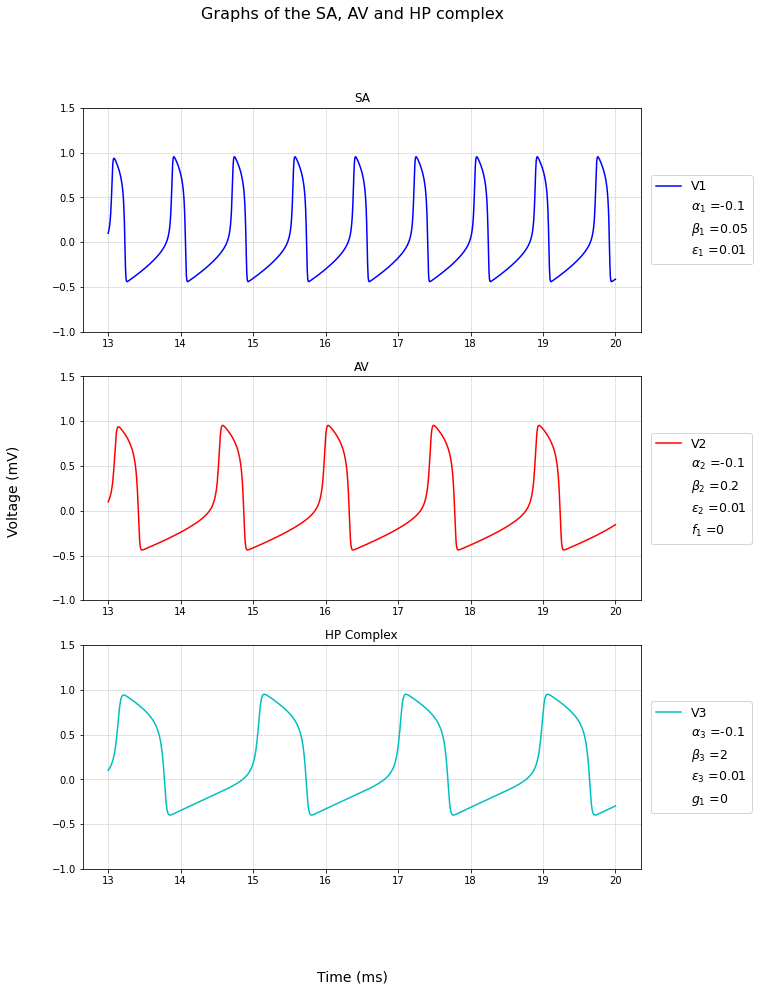

In [12]:
fig, (ax0,ax1,ax2) = plt.subplots(3,figsize=(10,14))
plt.suptitle('Graphs of the SA, AV and HP complex', fontsize=16)
"""Graph for the SA Subplot """

ax0.title.set_text('SA')
ax0.plot(t,V1, label='V1', color='b')  # V1 label

ax0.plot([ ],[ ],' ',label=r'$\alpha_1$ ={}'.format(a1))   # alpha1
ax0.plot([ ],[ ],' ',label=r'$\beta_1$ ={}'.format(b1))     # beta1
ax0.plot([ ],[ ],' ',label=r'$\epsilon_1$ ={}'.format(e1))     # epsilon1
ax0.legend(bbox_to_anchor=(0.85,0.5), loc="center left", borderaxespad=9)






"""Graph for the AV Subplot"""

ax1.title.set_text('AV')
ax1.plot(t,V2, label='V2', color='r')  # V2 label

ax1.plot([ ],[ ],' ',label=r'$\alpha_2$ ={}'.format(a2))   # alpha2
ax1.plot([ ],[ ],' ',label=r'$\beta_2$ ={}'.format(b2))     # beta2
ax1.plot([ ],[ ],' ',label=r'$\epsilon_2$ ={}'.format(e2))     # epsilon2
ax1.legend(bbox_to_anchor=(0.85,0.5), loc="center left", borderaxespad=9)

"""Bellow are the couplings constants f1 for the first AV equations - uncomment if not needed"""

ax1.plot([ ],[ ],' ',label=r'$f_1$ ={}'.format(f1))   #coupling constant f1 for V2


"""Graph for the HP Complex Subplot"""
ax2.title.set_text('HP Complex')
ax2.plot(t,V3, label='V3', color='c')  # V3 label

ax2.plot([ ],[ ],' ',label=r'$\alpha_3$ ={}'.format(a3))   # alpha3
ax2.plot([ ],[ ],' ',label=r'$\beta_3$ ={}'.format(b3))     # beta3
ax2.plot([ ],[ ],' ',label=r'$\epsilon_3$ ={}'.format(e3))     # epsilon3

"""Bellow are the couplings constants g1 for the first AV equations - uncomment if not needed"""

ax2.plot([ ],[ ],' ',label=r'$g_1$ ={}'.format(g1))   #coupling constant g1 for V3






plt.legend()

ax0.legend(bbox_to_anchor=(0.85,0.5), loc="center left", borderaxespad=7.5, fontsize=12.5)
ax1.legend(bbox_to_anchor=(0.85,0.5), loc="center left", borderaxespad=7.5, fontsize=12.5)
ax2.legend(bbox_to_anchor=(0.85,0.5), loc="center left", borderaxespad=7.5, fontsize=12.5)

ax0.grid(linestyle='--', linewidth=0.5)
ax1.grid(linestyle='--', linewidth=0.5)
ax2.grid(linestyle='--', linewidth=0.5)

ax0.set_yticks([-1, -0.5, 0, 0.5, 1, 1.5])
ax1.set_yticks([-1, -0.5, 0, 0.5, 1, 1.5])
ax2.set_yticks([-1, -0.5, 0, 0.5, 1, 1.5])

fig.supylabel('Voltage (mV)', fontsize=14)
fig.supxlabel('Time (ms)', fontsize=14)


fig.savefig('Rhyzi_intristic_plus_ECG', bbox_inches="tight", dpi=300)
plt.show()
